<a href="https://colab.research.google.com/github/kabi239/image-classication-/blob/main/miniProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing some libs
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
#from tensorflow.keras import datasets, layers, models

In [ ]:
# loading data
from keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()


In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#first image in form of array
index=0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

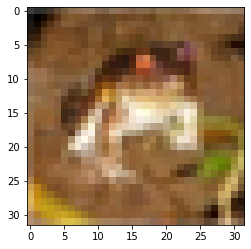

In [ ]:
#first image
img =plt.imshow(x_train[index])

In [ ]:
#img label
print('The image lable is:',y_train[index])

The image lable is: [6]


In [ ]:
#classification of image
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


In [ ]:
#10th image in form of array
index=10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

In [ ]:
#img label
print('The image lable is:',y_train[index])

The image lable is: [4]


In [ ]:
print('The image class is: ', classification[y_train[index][0]])

The image class is:  deer


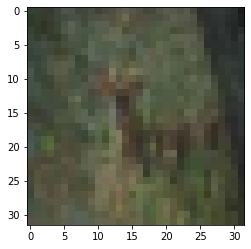

In [ ]:
#10th image
img =plt.imshow(x_train[index])

In [ ]:
#convering label into set of 10 no.s to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#printing the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#new label of image deer
print('The one hot lable is: ',y_train_one_hot[index])

The one hot lable is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#normalizing pixels -- values(0-1)
x_train =x_train/255
x_test =x_test/255


In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# comiling the model
cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
hist=cnn.fit(x_train, y_train_one_hot, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 82s 40ms/step - loss: 1.6719 - accuracy: 0.3903
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1490 - accuracy: 0.5926
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9920 - accuracy: 0.6532
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9035 - accuracy: 0.6847
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8288 - accuracy: 0.7106
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7679 - accuracy: 0.7338
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7207 - accuracy: 0.7503
Epoch 8/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6779 - accuracy: 0.7658
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6434 - accuracy: 0.7761
Epoch 10/10
1563/1563 [==============================] - 61s 39m

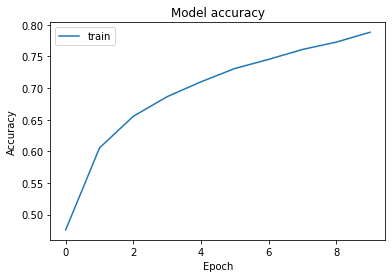

In [ ]:
#visualizing model
plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

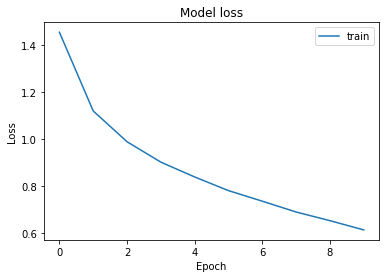

In [ ]:
#visualizing model loss
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper right')
plt.show()

In [ ]:
#test model
from google.colab import files
uploaded = files.upload()

Saving CRUISE_Charming.jpg to CRUISE_Charming (1).jpg


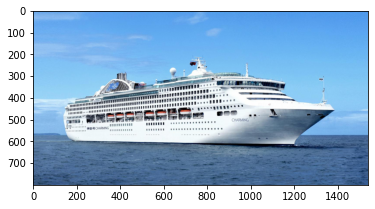

In [ ]:
#show image
new_img = plt.imread('CRUISE_Charming (1).jpg')
img= plt.imshow(new_img)

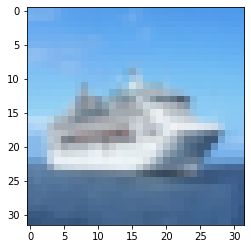

In [ ]:
from skimage.transform import resize
resized_img = resize(new_img,(32,32,3))
img =plt.imshow(resized_img)

In [ ]:
#prediction
pre = cnn.predict(np.array([resized_img]))
pre

array([[1.63160972e-02, 8.60823420e-05, 2.09696504e-04, 1.31323686e-05,
        2.94032725e-06, 8.29896635e-06, 2.44610419e-07, 1.06963306e-07,
        9.83352900e-01, 1.05732779e-05]], dtype=float32)

In [ ]:
#sort Predictions
list_index =[0,1,2,3,4,5,6,7,8,9]
x=pre
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      t =list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=t
#show sorted labels
print(list_index)      


[8, 0, 2, 1, 3, 9, 5, 4, 6, 7]


In [ ]:
#print the firt 5 pridictions
for i in range(5):
  print(classification[list_index[i]],':',round(pre[0][list_index[i]]*100,2), '%')

ship : 98.34 %
airplane : 1.63 %
bird : 0.02 %
automobile : 0.01 %
cat : 0.0 %
